In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string

In [2]:
dataframe = pd.read_json('tweets.json', lines=True)
dataframe.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,NaN,2018-12-09 06:55:26,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,{'created_at': 'Sun Dec 09 06:34:00 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @prichan_PR: 「Pripara Friendship Tour 2019 ...,2018-12-09 06:55:26.383,False,"{'id': 239472833, 'id_str': '239472833', 'name..."
1,NaN,NaN,2018-12-09 06:55:26,NaN,"{'hashtags': [{'text': 'おなくら', 'indices': [103...",NaN,NaN,0,False,low,...,NaN,0,0,False,{'created_at': 'Sun Dec 09 04:17:08 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @tecokishinbashi: 超清純系美少女！これぞ「王道清楚」と言わんばかりの...,2018-12-09 06:55:26.482,False,"{'id': 613703379, 'id_str': '613703379', 'name..."
2,NaN,NaN,2018-12-09 06:55:26,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,0,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",https://t.co/bsqksr6g4E,2018-12-09 06:55:26.488,False,"{'id': 1613891329, 'id_str': '1613891329', 'na..."
3,NaN,NaN,2018-12-09 06:55:26,NaN,"{'hashtags': [{'text': '렌', 'indices': [58, 60...","{'media': [{'id': 1070943006310580225, 'id_str...",NaN,0,False,low,...,NaN,0,0,False,{'created_at': 'Fri Dec 07 07:31:19 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @NUESTNEWS: [PHOTO] 태국 잡지 &lt;SUDSAPDA&gt; ...,2018-12-09 06:55:26.489,False,"{'id': 867736499931893761, 'id_str': '86773649..."
4,NaN,NaN,2018-12-09 06:55:26,NaN,"{'hashtags': [{'text': 'pixiv', 'indices': [32...",NaN,NaN,0,False,low,...,NaN,0,0,False,{'created_at': 'Sun Dec 09 02:55:08 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @b2j135: 特別で究極のスマブラ！！ | サムーれ #pixiv https:/...,2018-12-09 06:55:26.678,False,"{'id': 3133683903, 'id_str': '3133683903', 'na..."


In [3]:
dataframe.shape[0]

3021

In [4]:
df1 = dataframe[['lang', 'text']]
df1.head()

,lang,text
0,ja,RT @prichan_PR: 「Pripara Friendship Tour 2019 ...
1,ja,RT @tecokishinbashi: 超清純系美少女！これぞ「王道清楚」と言わんばかりの...
2,und,https://t.co/bsqksr6g4E
3,ko,RT @NUESTNEWS: [PHOTO] 태국 잡지 &lt;SUDSAPDA&gt; ...
4,ja,RT @b2j135: 特別で究極のスマブラ！！ | サムーれ #pixiv https:/...


In [7]:
locations = []
for i in dataframe['user']:
    location = i['location']
    locations.append(location)
df2 = pd.DataFrame(locations, columns = ['location'])
df2.head()

,location
0,彩(あや)の国
1,新宿歌舞伎町
2,Bahamas
3,"ปทุมธานี, ประเทศไทย"
4,"Baton Rouge, LA"


In [8]:
df = pd.concat([df1, df2], axis=1)
df.loc[2993]['text']

'C &amp; C++ Language tutorial for beginners|C Programming Tutorial in urdu/hindi Lecture 10 by Sir Majid: https://t.co/NZeUy6kvSw via'

In [9]:
df['lang'].unique()

array(['ja', 'und', 'ko', 'th', 'en', 'mr', 'ka', 'tl', 'ar', 'te', 'in',
       'ca', 'fr', 'pt', 'ru', 'ckb', 'hi', 'nl', 'ta', 'de', 'el', 'es',
       'eu', 'fi', 'cs', 'ht', 'ml', 'bn', 'it', 'vi', 'lv', 'hu', 'ps',
       'tr', 'et', 'no', 'sr', 'lt', 'da', 'zh', 'sv', 'iw', 'ro', 'ur',
       'pa', 'si', 'km', 'pl', 'uk', 'is', 'bg', 'am', 'fa', 'cy'],
      dtype=object)

In [10]:
df['lang'].nunique()

54

Text(0, 0.5, 'Number of tweets')

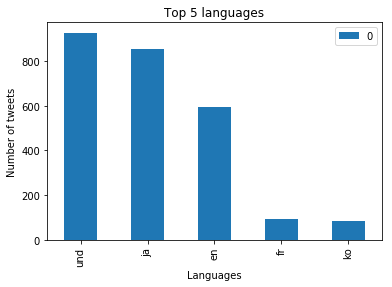

In [11]:
top_lang = df['lang'].value_counts()
top5_lang = dict(top_lang[:5])
top5_lang_hist = pd.DataFrame.from_dict(top5_lang, orient='index')
top5_lang_hist.plot(kind='bar')
plt.title("Top 5 languages")
plt.xlabel("Languages")
plt.ylabel("Number of tweets")



{'日本': 23, 'Nowhere': 19, '日本 東京': 15, 'دبي جنة الدنيا ': 13, 'Thailand': 11}


Text(0, 0.5, 'Number of tweets')

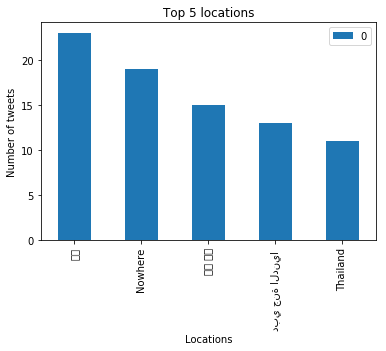

In [12]:
top_location = df['location'].value_counts()
top5_location = dict(top_location[:5])
print(top5_location)
top5_location_hist = pd.DataFrame.from_dict(top5_location, orient='index')
top5_location_hist.plot(kind='bar')
plt.title('Top 5 locations')
plt.xlabel('Locations')
plt.ylabel('Number of tweets')

In [13]:
df_eng = df[df['lang'] == 'en']
df_eng.shape[0]

593

In [14]:
keywords = ['tutorial', 'programming', 'software', 'linux', 
            'winidows', 'mac os', 'data', 'dictionary']
df_rel = df_eng[df_eng['text'].str.contains('|'.join(keywords))]

In [15]:
df_rel.shape[0]

6

{'python': 0, 'java': 0, 'c++': 1, 'golang': 0, 'php': 0}


Text(0, 0.5, 'Number of relevant tweets')

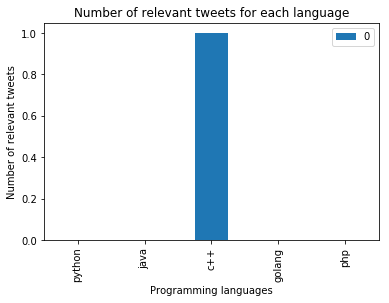

In [17]:
import re
keywords = ['python', 'java', 'c++', 'golang', 'php']
dicts = {}
for i in keywords:
    df3 = df_rel[df_rel['text'].str.contains(i, regex=False, case=False)]
    if df3.shape[0] != 0:
        file = open("{0}.txt".format(i), "w")
        for tweet in df3['text']:
            for word in tweet.split(' '):
                if word.startswith('http://') or word.startswith('https://'):
                    file.write(word)
            
    dicts[i] = df3.shape[0]    
print(dicts)
num_rel = pd.DataFrame.from_dict(dicts, orient='index')
num_rel.plot(kind='bar')
plt.title('Number of relevant tweets for each language')
plt.xlabel('Programming languages')
plt.ylabel('Number of relevant tweets')